Name: Zarin Rafa

ID: 2021-2-60-064

Lab Task: 01

Importing all the Libraries



---



In [2]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

Mounting

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



---



Question - 01

---

Determine the perimeter of an object by using 4 connected neighborhoods and 8
connected neighborhoods.

Perimeter using 4-connected neighborhood: 1403.0
Perimeter using 8-connected neighborhood: 1930.0


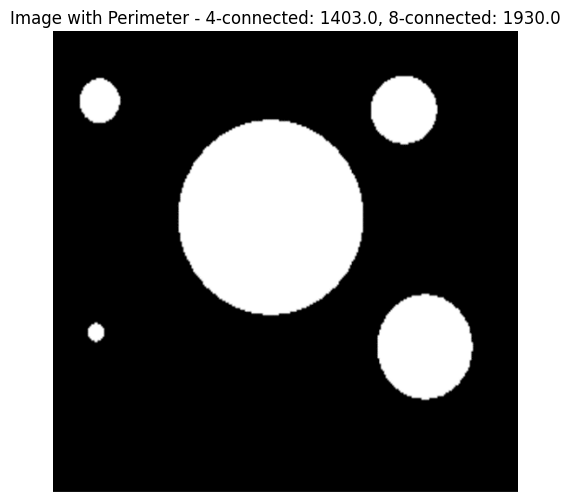

In [5]:

# Function to calculate the perimeter of the input image
def calculate_perimeter(image):
    # Threshold the image to create a binary mask
    # Converts the grayscale image into a binary image (black & white)
    # It helps understanding the image better
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Pixels greater than 127 are set to 255 (white), and others are set to 0 (black)
    # 127 is used as it is a common threshold value for visualization

    # Define the kernels for 4-connected and 8-connected neighborhoods
    # Kernel for 4-connected neighborhood (cross-shaped)
    kernel_4 = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

    # Kernel for 8-connected neighborhood (square-shaped)
    kernel_8 = np.ones((3, 3), dtype=np.uint8)

    # Erosion shrinks white regions by checking neighboring pixels
    # Apply erosion with the 4-connected kernel
    eroded_4 = cv2.erode(binary, kernel_4)
    # Apply erosion with the 8-connected kernel
    eroded_8 = cv2.erode(binary, kernel_8)

    # Computing the perimeter by subtracting the eroded image from the original binary image
    # The difference will highlight the border pixels (the perimeter)
    perimeter_4 = np.sum(binary - eroded_4) // 255
    perimeter_8 = np.sum(binary - eroded_8) // 255

    # Return the calculated perimeters for both 4-connected and 8-connected neighborhoods
    return perimeter_4, perimeter_8

# Read the image in grayscale
# Make sure the image is available at this path
fig1 = cv2.imread('/content/drive/MyDrive/images/fig1.png', cv2.IMREAD_GRAYSCALE)

# Calculate the perimeters using the defined function
perimeter_4, perimeter_8 = calculate_perimeter(fig1)

# Print the perimeter values for both neighborhood types
print(f"Perimeter using 4-connected neighborhood: {perimeter_4}")
print(f"Perimeter using 8-connected neighborhood: {perimeter_8}")

# Plot the image and display the perimeter values in the title
plt.figure(figsize=(6, 6))
plt.imshow(fig1, cmap='gray')
plt.title(f"Image with Perimeter - 4-connected: {perimeter_4}, 8-connected: {perimeter_8}")
plt.axis('off')  # Hide the axis for cleaner visualization
plt.show()


**Question**-02

Create a binary image using a threshold.


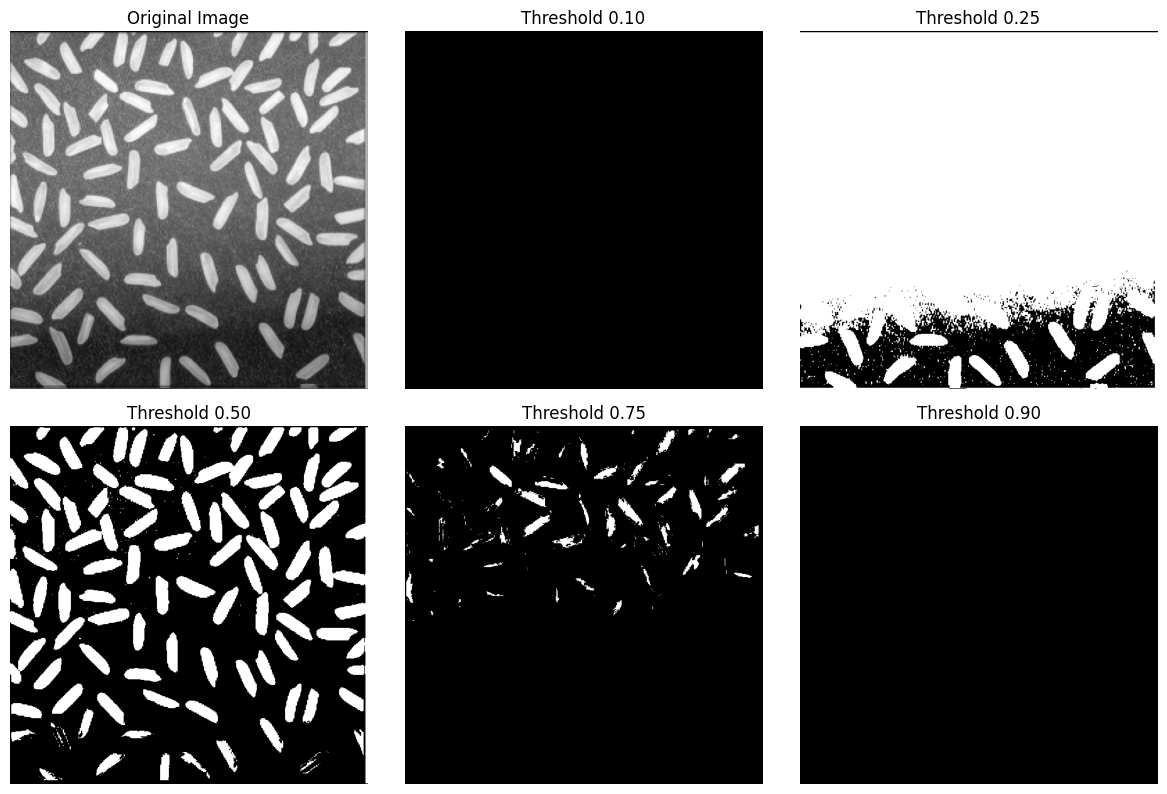

In [6]:
# Read the image in grayscale
file_path = '/content/drive/MyDrive/images/fig2.png'
fig2 = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(fig2, cmap='gray')
plt.title("Original Image")
plt.axis("off")  # Hide axis

# Thresholds
_, threshold_010 = cv2.threshold(fig2, 26, 255, cv2.THRESH_BINARY)
_, threshold_025 = cv2.threshold(fig2, 64, 255, cv2.THRESH_BINARY)
_, threshold_050 = cv2.threshold(fig2, 128, 255, cv2.THRESH_BINARY)
_, threshold_075 = cv2.threshold(fig2, 192, 255, cv2.THRESH_BINARY)
_, threshold_090 = cv2.threshold(fig2, 230, 255, cv2.THRESH_BINARY)

# Plotting Thresholded Images
plt.subplot(3, 3, 2)
plt.imshow(threshold_010, cmap='gray')
plt.title("Threshold 0.10")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(threshold_025, cmap='gray')
plt.title("Threshold 0.25")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(threshold_050, cmap='gray')
plt.title("Threshold 0.50")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(threshold_075, cmap='gray')
plt.title("Threshold 0.75")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(threshold_090, cmap='gray')
plt.title("Threshold 0.90")
plt.axis("off")

plt.tight_layout()
plt.show()

**Question**-**3**

---
Determine the number of objects in the binary image generated in Question 2
using the concept of connectivity.


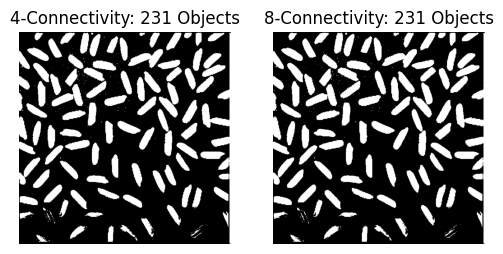

In [8]:
# 'threshold_050' is a binary image already have
# cv2.connectedComponents() ---> finds all connected objects in the binary image.
# return the number of labels.
num_labels_4, labels = cv2.connectedComponents(threshold_050)
# 'num_labels_4' will contain the number of connected components including the background.
# 'labels' is an image where each connected component has a unique label.


# 'connectivity=8' to consider diagonal connections as well.
num_labels_8, label2 = cv2.connectedComponents(threshold_050, connectivity=8)
# 'num_labels_8' will contain the number of connected components including the background (diagonal connections are now considered).
# 'label2' is the labeled image for 8-connectivity, where each region has a unique integer label.

#  image with 4-connectivity object count
plt.figure(figsize=(6, 6))


plt.subplot(1, 2, 1)
plt.imshow(threshold_050, cmap="gray")

plt.title(f"4-Connectivity: {num_labels_4 - 1} Objects")
plt.axis("off")

# binary image with 8-connectivity object count
plt.subplot(1, 2, 2)
plt.imshow(threshold_050, cmap="gray")

plt.title(f"8-Connectivity: {num_labels_8 - 1} Objects")
plt.axis("off")

plt.show()

Question 4

---

Find the Euclidean distance between two points of the image.

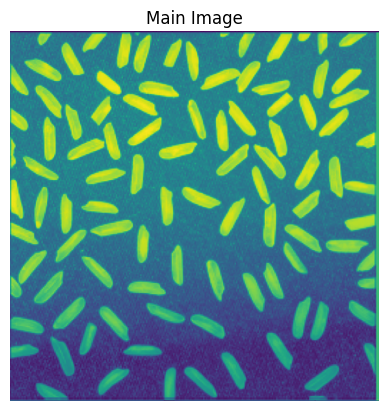

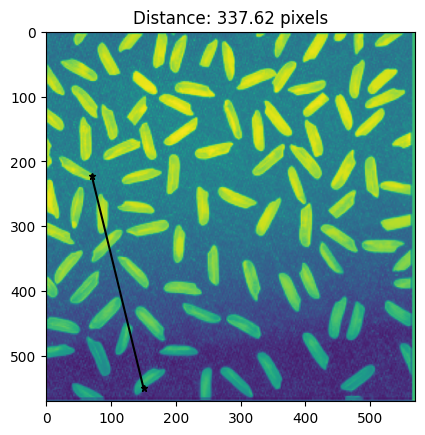

In [22]:
plt.imshow (fig2)
plt.title("Main Image")
plt.axis("off")
plt.show()
#points = plt.ginput(2)
(x1, y1) = 70,222
(x2, y2) = 150,550

distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Show the image with points marked
plt.imshow(fig2)
plt.plot([x1, x2], [y1, y2], marker='*', markersize=5, color='black')  # Mark points
plt.title(f"Distance: {distance:.2f} pixels")
plt.show()  # Show the updated image

Question-5

---
Apply the following operations using Fig.1 and Fig.2:


a. Addition
b. Subtraction
c. Multiplication
d. Division

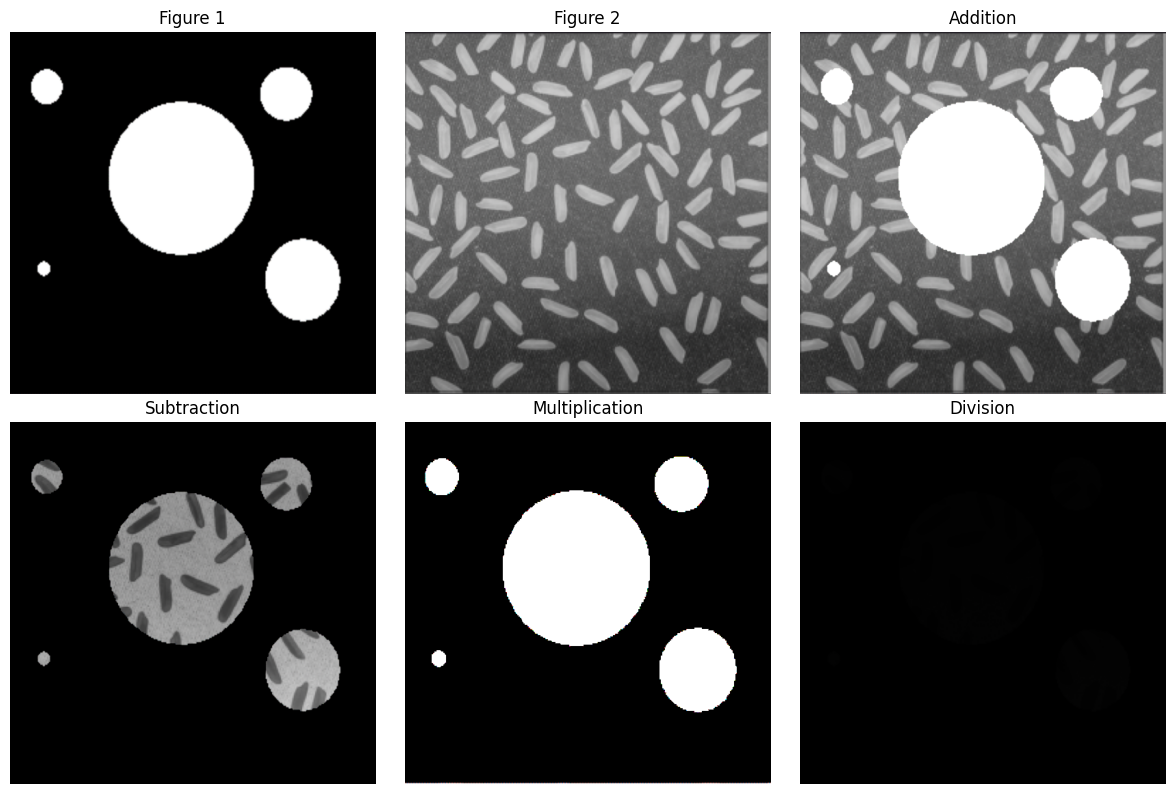

In [23]:
Fig1=cv2.imread('/content/drive/MyDrive/images/fig1.png')
Fig2=cv2.imread('/content/drive/MyDrive/images/fig2.png')


# Resize Fig2 to match the size of Fig1 if they are not the same size
if Fig1.shape[:2] != Fig2.shape[:2]:
    Fig2 = cv2.resize(Fig2, (Fig1.shape[1], Fig1.shape[0]))

# 1. Addition
addedImage = cv2.add(Fig1, Fig2)

# 2. Subtraction
subtractedImage = cv2.subtract(Fig1, Fig2)

# 3. Multiplication
mul = cv2.multiply(Fig2, Fig1)

# 4. Division
dividedImage = cv2.divide(Fig1, Fig2)

# Convert images to RGB for displaying with matplotlib (OpenCV uses BGR by default) otherewise colors would be wrong
Fig1_rgb = cv2.cvtColor(Fig1, cv2.COLOR_BGR2RGB)
Fig2_rgb = cv2.cvtColor(Fig2, cv2.COLOR_BGR2RGB)
addedImage_rgb = cv2.cvtColor(addedImage, cv2.COLOR_BGR2RGB)
subtractedImage_rgb = cv2.cvtColor(subtractedImage, cv2.COLOR_BGR2RGB)
mul_rgb = cv2.cvtColor(mul, cv2.COLOR_BGR2RGB)
dividedImage_rgb = cv2.cvtColor(dividedImage, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(Fig1_rgb)
plt.title('Figure 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(Fig2_rgb)
plt.title('Figure 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(addedImage_rgb)
plt.title('Addition')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(subtractedImage_rgb)
plt.title('Subtraction')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(mul_rgb)
plt.title('Multiplication')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(dividedImage_rgb)
plt.title('Division')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

Question -6

---

Apply the following operations using Fig.1 and Fig.2: a. AND
b. OR  c. Not

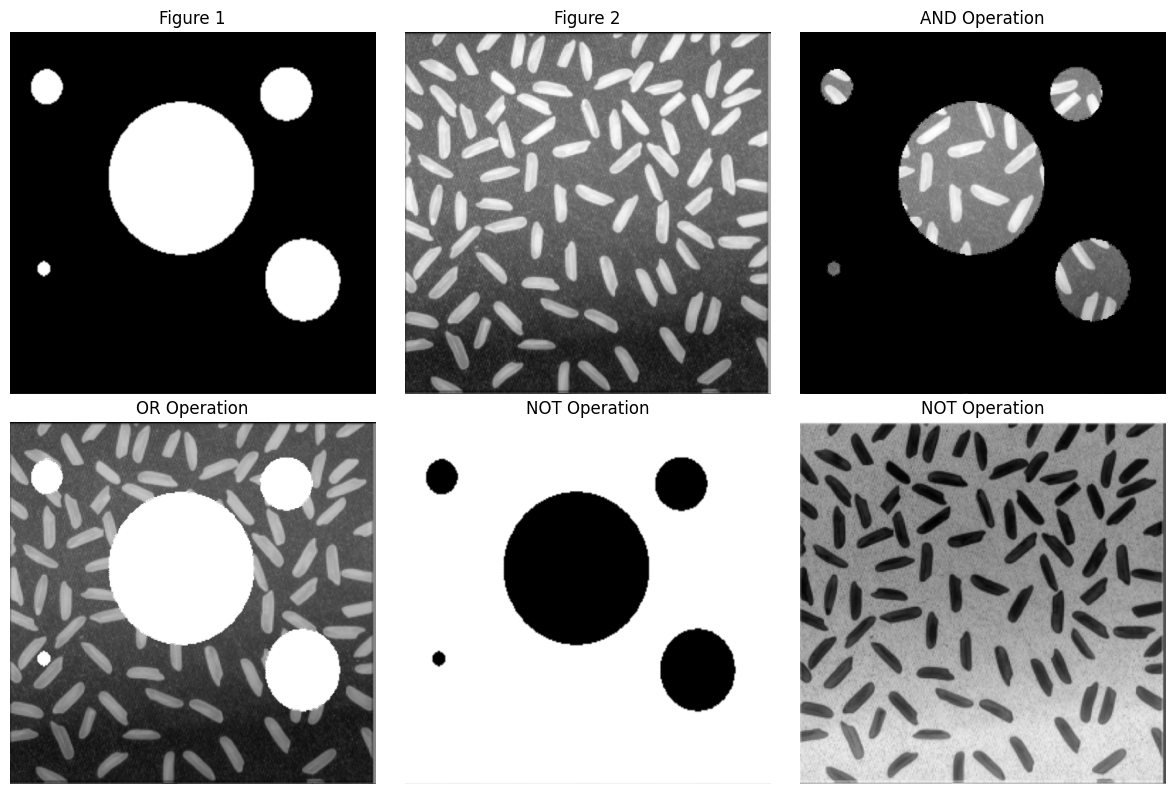

In [24]:
# Read images in grayscale
Fig1 = cv2.imread('/content/drive/MyDrive/images/fig1.png', cv2.IMREAD_GRAYSCALE)
Fig2 = cv2.imread('/content/drive/MyDrive/images/fig2.png', cv2.IMREAD_GRAYSCALE)

# Resize Fig2 to match the size of Fig1 if they are not the same size
if Fig1.shape[:2] != Fig2.shape[:2]:
    Fig2 = cv2.resize(Fig2, (Fig1.shape[1], Fig1.shape[0]))

# 1. AND operation
andImage = cv2.bitwise_and(Fig1, Fig2)

# 2. OR operation
orImage = cv2.bitwise_or(Fig1, Fig2)

# 3. NOT operation (applies to Fig2 in this case)
notImage1 = cv2.bitwise_not(Fig1)
notImage2 = cv2.bitwise_not(Fig2)

# Plot the images
plt.figure(figsize=(12, 8))

# Plot Fig1
plt.subplot(2, 3, 1)
plt.imshow(Fig1, cmap='gray')  # Using gray colormap for grayscale images
plt.title('Figure 1')
plt.axis('off')

# Plot Fig2
plt.subplot(2, 3, 2)
plt.imshow(Fig2, cmap='gray')
plt.title('Figure 2')
plt.axis('off')

# Plot AND result
plt.subplot(2, 3, 3)
plt.imshow(andImage, cmap='gray')
plt.title('AND Operation')
plt.axis('off')

# Plot OR result
plt.subplot(2, 3, 4)
plt.imshow(orImage, cmap='gray')
plt.title('OR Operation')
plt.axis('off')

# Plot NOT result 1
plt.subplot(2, 3, 5)
plt.imshow(notImage1, cmap='gray')
plt.title('NOT Operation')
plt.axis('off')

# Plot NOT result 2
plt.subplot(2, 3, 6)
plt.imshow(notImage2, cmap='gray')
plt.title('NOT Operation')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


Question -7

---
Adjust the contrast of fig 4


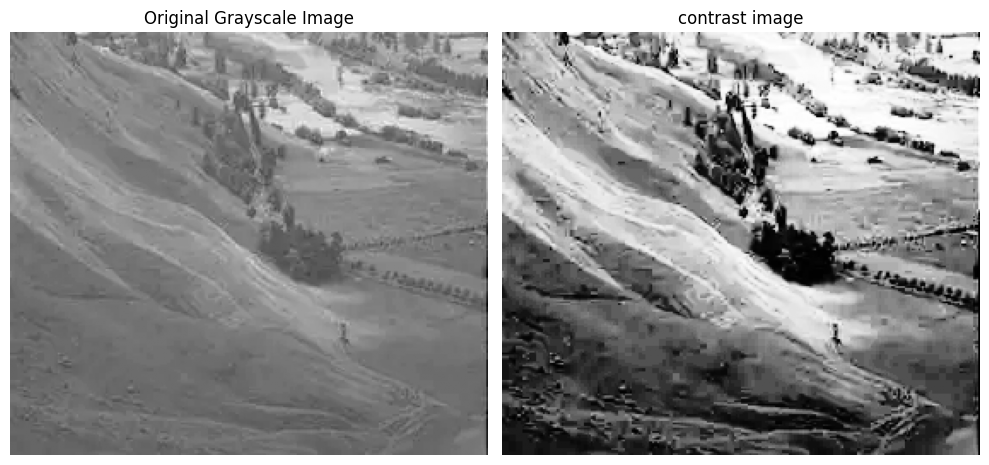

In [25]:
img = cv2.imread('/content/drive/MyDrive/images/fig4.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to improve the contrast
contrast_fix = cv2.equalizeHist(img)

# Show the original and the contrast adjusted image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contrast_fix, cmap='gray')
plt.title('contrast image')
plt.axis('off')

plt.tight_layout()
plt.show()


Question -8

---
Brighten the Image


In [26]:
img = cv2.imread('/content/drive/MyDrive/images/fig5a.jpg')

# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Brighten the image
bri_img = cv2.convertScaleAbs(img, alpha=3.0, beta=10)

# Convert the brightened image to RGB
bri_img_rgb = cv2.cvtColor(bri_img, cv2.COLOR_BGR2RGB)

# Display the original and brightened images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Brightened image
plt.subplot(1, 2, 2)
plt.imshow(bri_img_rgb)
plt.title('Brightened Image')
plt.axis('off')




error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Question -9

---
Quantize the Grayscale image by 8 levels.


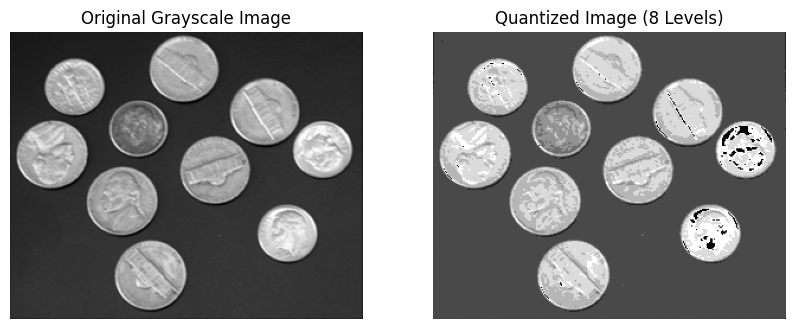

In [27]:
img = cv2.imread('/content/drive/MyDrive/images/fig6.png', cv2.IMREAD_GRAYSCALE)

# quantization
quantized_img = np.round(img / (256 / 8)) * (256 / 8)
quantized_img = np.uint8(quantized_img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Quantized image
plt.subplot(1, 2, 2)
plt.imshow(quantized_img, cmap='gray')
plt.title('Quantized Image (8 Levels)')
plt.axis('off')

plt.show()


Question -10


---

Digital Negative of Image

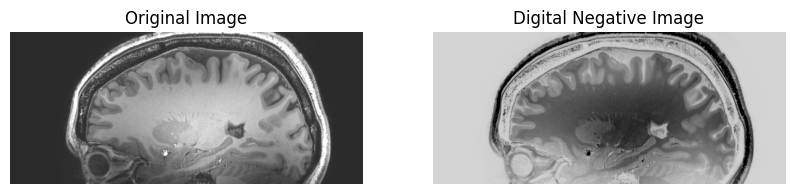

In [28]:
img = cv2.imread('/content/drive/MyDrive/images/fig7.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

negative_img = 255 - img
negative_img_rgb = cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img_rgb)
plt.title('Digital Negative Image')
plt.axis('off')


plt.show()